In [5]:
#!pip install kornia

In [7]:
#!pip install fastai

In [18]:
#!pip install opencv-python

In [19]:
#pip install nibabel


In [23]:
import os
import glob
import cv2
import imageio

import numpy as np 
import pandas as pd 
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

In [24]:
import fastai; fastai.__version__

'2.7.9'

In [ ]:
file_list = []

for dirname, _, filenames in os.walk('../input/liver-tumor-segmentation'):
    for filename in filenames:
        file_list.append((dirname, filename)) 

for dirname, _, filenames in os.walk('../input/liver-tumor-segmentation-part-2'):
    for filename in filenames:
        file_list.append((dirname, filename)) 

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files.sort_values(by=['filename'], ascending=True)    

In [26]:
os.chdir('D:\Education\Capstone\Liver Segmentation\data')

In [31]:
os.getcwd()

'D:\\Education\\Capstone\\Liver Segmentation\\data'

In [40]:
file_list = []
for dirname, _, filenames in os.walk('D:\Education\Capstone\Liver Segmentation\data\lits17'):
    for filename in filenames:
        file_list.append((dirname, filename))

In [42]:
for dirname, _, filenames in os.walk('D:\Education\Capstone\Liver Segmentation\data\lits17-2'):
    for filename in filenames:
        file_list.append((dirname, filename)) 

In [43]:
df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files.sort_values(by=['filename'], ascending=True) 

,dirname,filename
0,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-0.nii
1,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-1.nii
2,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-10.nii
3,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-100.nii
4,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-101.nii
...,...,...
227,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-95.nii
228,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-96.nii
229,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-97.nii
230,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-98.nii


In [44]:
file_list

[('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-0.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-1.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-10.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-100.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-101.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-102.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-103.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-104.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17\\segmentations',
  'segmentation-105.nii'),
 ('D:\\Education\\Capstone\\Liver Segmentation\\data\\lits17

In [57]:
df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 

df_files

,dirname,filename,mask_dirname,mask_filename
0,D:\Education\Capstone\Liver Segmentation\data\lits17\volume_pt1,volume-0.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-0.nii
1,D:\Education\Capstone\Liver Segmentation\data\lits17\volume_pt1,volume-1.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-1.nii
2,D:\Education\Capstone\Liver Segmentation\data\lits17\volume_pt1,volume-10.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-10.nii
3,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-100.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-100.nii
4,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt8,volume-101.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-101.nii
...,...,...,...,...
126,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-95.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-95.nii
127,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-96.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-96.nii
128,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-97.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-97.nii
129,D:\Education\Capstone\Liver Segmentation\data\lits17-2\volume_pt6,volume-98.nii,D:\Education\Capstone\Liver Segmentation\data\lits17\segmentations,segmentation-98.nii


In [58]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [59]:
# Read sample

sample = 0
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 75)
Mask Shape: (512, 512, 75)


In [60]:
print(np.amin(sample_ct), np.amax(sample_ct))
print(np.amin(sample_mask), np.amax(sample_mask))

-3024.0 1410.0
0.0 2.0


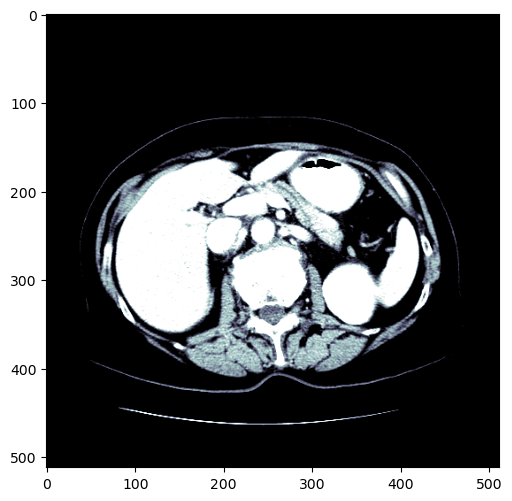

In [61]:
# Preprocess the nii file 
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)

plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [62]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')
             
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')
    
    plt.show()

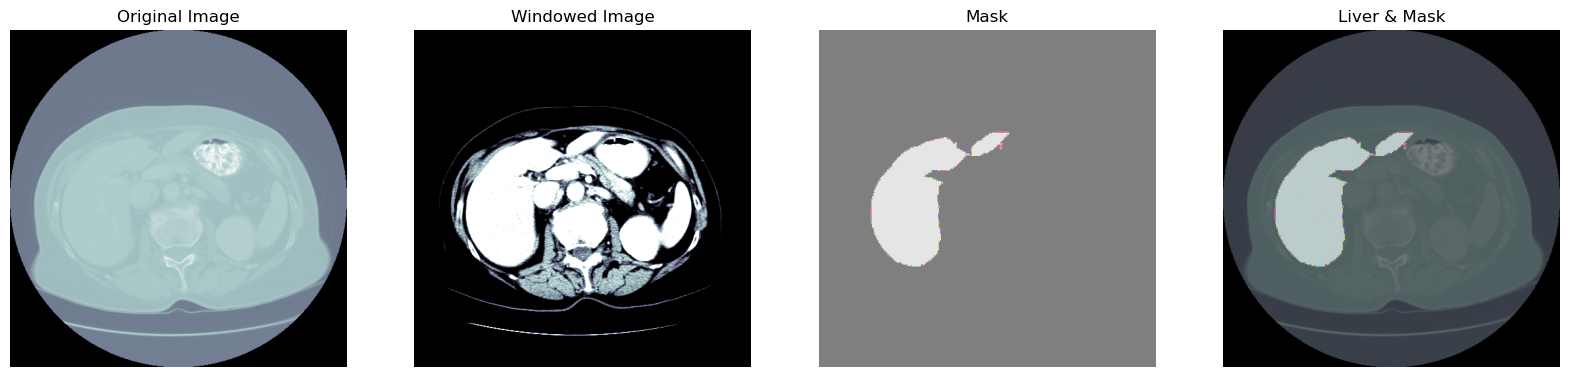

In [63]:
sample = 55

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

In [64]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
unique, counts = np.unique(mask, return_counts=True)
print(np.array((unique, counts)).T)

[[     0 244111]
 [     1  18033]]


<AxesSubplot:>

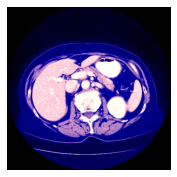

In [65]:
# Preprocessing functions
# Source https://docs.fast.ai/medical.imaging

class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

In [67]:
# Make custom JPG files for Unet training
# Total number of 131 nii files contains 67072 slices 

GENERATE_JPG_FILES = True

if (GENERATE_JPG_FILES) :
    
    path = Path(".")

    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(df_files),3)): # take 1/3 nii files for training
        curr_ct        = read_nii(df_files.loc[ii,'dirname']+"/"+df_files.loc[ii,'filename'])
        curr_mask      = read_nii(df_files.loc[ii,'mask_dirname']+"/"+df_files.loc[ii,'mask_filename'])
        curr_file_name = str(df_files.loc[ii,'filename']).split('.')[0]
        curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim

        for curr_slice in range(0,curr_dim,2): # export every 2nd slice for training
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")
else:
    path = Path("D:\Education\Capstone\Liver Segmentation\data") # read jpg from saved kernel output

  0%|          | 0/44 [00:00<?, ?it/s]

In [68]:
BATCH_SIZE = 16
IMAGE_SIZE = 128

codes = np.array(["background","liver","tumor"])
    
def get_x(fname:Path): return fname
def label_func(x): return path/'train_masks'/f'{x.stem}_mask.png'

tfms = [IntToFloatTensor(),Normalize()]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)),  #codes = {"Backround": 0,"Liver": 1,"Tumor": 2}
               batch_tfms=tfms,
               splitter=RandomSplitter(),
               item_tfms=[Resize(IMAGE_SIZE)],
               get_items=get_image_files,
               get_y=label_func)

ds = db.datasets(source=path/'train_images')

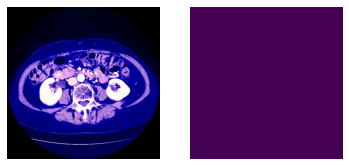

In [69]:
idx = 20
imgs = [ds[idx][0],ds[idx][1]]
fig, axs = plt.subplots(1, 2)

for i,ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(imgs[i])

In [70]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 262144]]


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


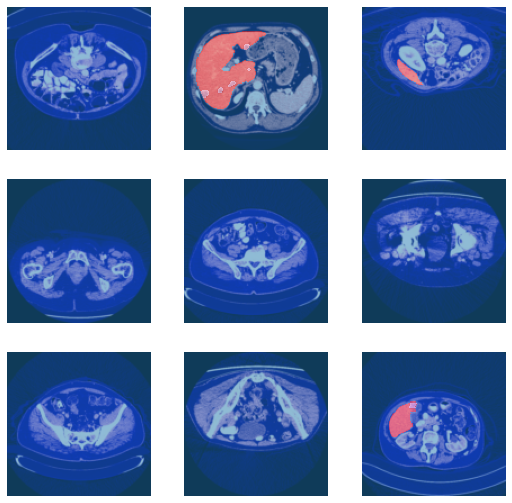

In [71]:
dls = db.dataloaders(path/'train_images', bs = BATCH_SIZE) #, num_workers=0
dls.show_batch()

In [72]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

In [73]:
learn = unet_learner(dls,
                     resnet50,
                     loss_func=CrossEntropyLossFlat(axis=1),
                     metrics=[foreground_acc, cust_foreground_acc]) 

C:\Users\HARSHA\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\HARSHA\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\HARSHA/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [74]:
learn.fine_tune(5, wd=0.1, cbs=SaveModelCallback() )

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.015050,0.012000,0.838420,0.995749,8:02:00


Better model found at epoch 0 with valid_loss value: 0.011999699287116528.


epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time


KeyboardInterrupt: 

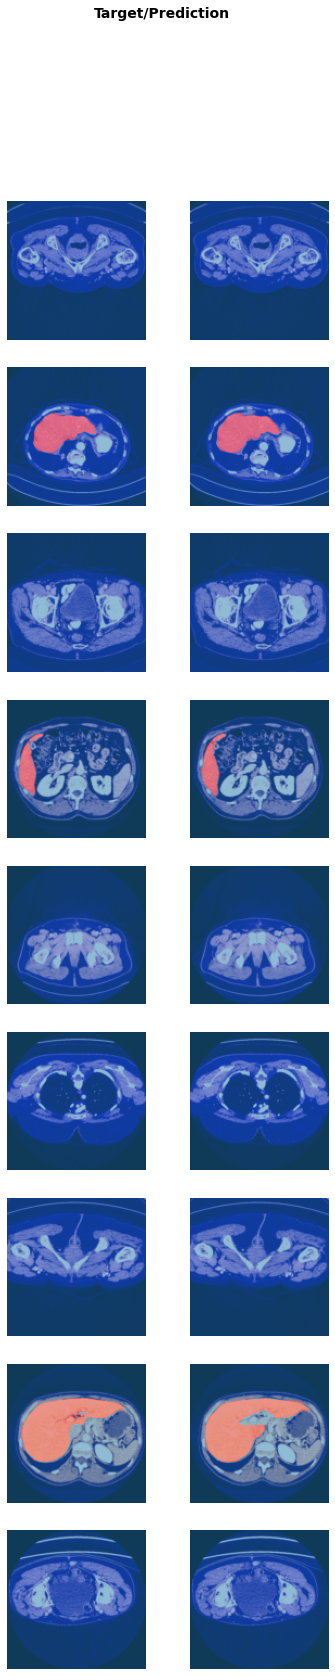

In [75]:
learn.show_results()

In [77]:
# Save the model
learn.export(path/f'Liver_segmentation')

In [78]:
# Load saved model
if (GENERATE_JPG_FILES) :
    
    tfms = [Resize(IMAGE_SIZE), IntToFloatTensor(),Normalize()]
    learn0 = load_learner(path/f'Liver_segmentation',cpu=False )
    learn0.dls.transform = tfms

In [79]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    
    for curr_slice in range(curr_dim):
        data = tensor(test_nii[...,curr_slice].astype(np.float32))
        data = (data.to_nchan(wins)*255).byte()
        slices.append(TensorImage(data))
                      
    return slices 

(512, 512, 501)


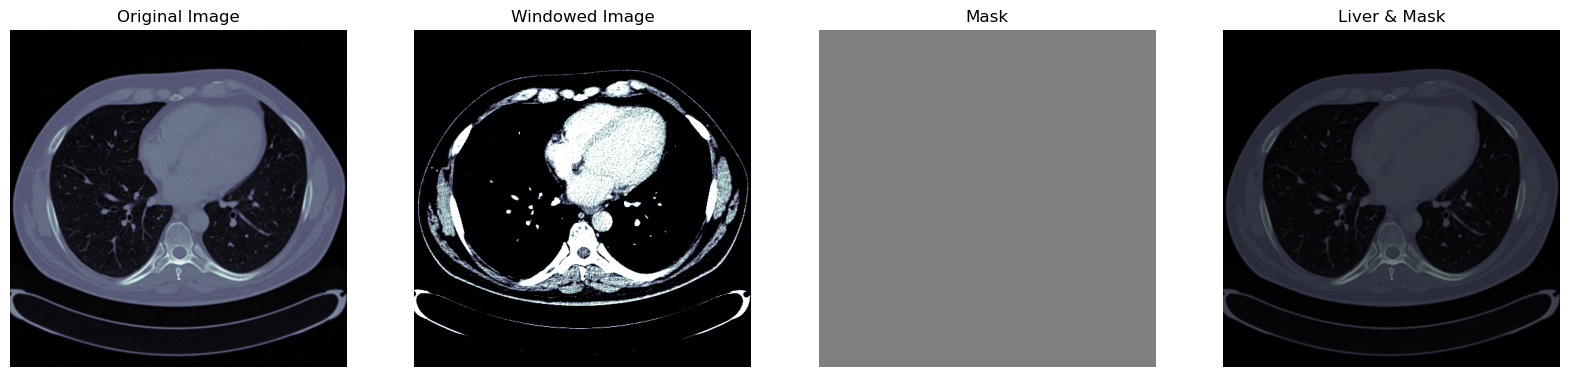

In [86]:
#tes=20 -> 3
tst = 3

test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

test_slice_idx = 500

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

In [87]:
# Prepare a nii test file for prediction 

test_files = nii_tfm(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'],[dicom_windows.liver, dicom_windows.custom])
print("Number of test slices: ", len(test_files))


Number of test slices:  501


<AxesSubplot:>

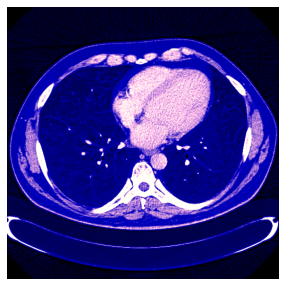

In [88]:
# Check an input for a test file
show_image(test_files[test_slice_idx])

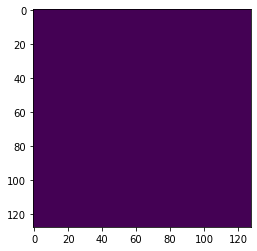

In [89]:
# Get predictions for a Test file

test_dl = learn0.dls.test_dl(test_files)
preds, y = learn0.get_preds(dl=test_dl)

predicted_mask = np.argmax(preds, axis=1)

plt.imshow(predicted_mask[test_slice_idx])